##Step 1
Collect data from Kaggle, [Dataset_Link](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data) .
Use Kaggle CLI to download the dataset in google colab

In [ ]:
#!/bin/bash
!kaggle datasets download harrimansaragih/dummy-advertising-and-sales-data

Dataset URL: https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data
License(s): CC0-1.0
  0% 0.00/92.7k [00:00<?, ?B/s]
100% 92.7k/92.7k [00:00<00:00, 39.4MB/s]




---



After downloading the dataset, extract the zip file in Colab's local storage using the following command:

In [ ]:
import zipfile
zip = zipfile.ZipFile('/content/dummy-advertising-and-sales-data.zip','r')
zip.extractall()
zip.close()

In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/Dummy Data HSS.csv')
dataset.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


## Step 2: Data Preprocessing



---



Check which column contain null values



---



In [ ]:
dataset.isnull().sum()

,0
TV,10
Radio,4
Social Media,6
Influencer,0
Sales,6




---



If we work with null values,model will not perform well,so fill the null values with the mean of the dataset.



---



In [ ]:
import numpy as np
numeric_cols = dataset.select_dtypes(include=np.number).columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

In [ ]:
dataset.isnull().sum()

,0
TV,0
Radio,0
Social Media,0
Influencer,0
Sales,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   float64
 1   Radio         4572 non-null   float64
 2   Social Media  4572 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4572 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB




---



The 'Influencer' column contains categorical data; convert them to numerical format for better processing.Using [One Hot encoding](https://www.geeksforgeeks.org/ml-one-hot-encoding/), convert categorical data to numerical data



---



In [ ]:
categorical_columns = dataset.select_dtypes(include=['object']).columns
dataset = pd.get_dummies(dataset, columns=categorical_columns)

In [ ]:
dataset[dataset.select_dtypes(include=['bool']).columns] = dataset.select_dtypes(include=['bool']).astype(int)

In [ ]:
dataset

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,0,1,0
...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,0,0,1,0
4568,71.0,20.610685,6.545573,249.101915,0,0,0,1
4569,44.0,19.800072,5.096192,163.631457,0,0,1,0
4570,71.0,17.534640,1.940873,253.610411,1,0,0,0


In [ ]:
dataset.columns

Index(['TV', 'Radio', 'Social Media', 'Sales', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'],
      dtype='object')



---




Store the features in X and the labels in y.



---



In [ ]:
X = dataset.drop(['Sales'], axis = 1).to_numpy()
y = dataset['Sales'].to_numpy()


Split the dataset for training and test.



---



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3657, 7)
(3657,)
(915, 7)
(915,)


## Step 3: Model Creating


Create a Linear Regression Model and train it



---



In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

After training, use the model to predict on train and test data to calculate [RMSE](https://help.sap.com/docs/SAP_PREDICTIVE_ANALYTICS/41d1a6d4e7574e32b815f1cc87c00f42/5e5198fd4afe4ae5b48fefe0d3161810.html) and [R² scores](https://www.geeksforgeeks.org/ml-r-squared-in-regression-analysis/).

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


xtrain = model.predict(X_train)
xtest = model.predict(X_test)

train_mse = mean_squared_error(y_train, xtrain)
test_mse = mean_squared_error(y_test, xtest)


train_r2 = r2_score(y_train, xtrain)
test_r2 = r2_score(y_test, xtest)

print("Train MSE: ", train_mse**0.5)
print("Test MSE: ", test_mse**0.5)

print("Train r2 error: ", train_r2)
print("Test r2 error: ", test_r2)

Train MSE:  8.000596738129106
Test MSE:  5.5909151825402015
Train r2 error:  0.9926770844403486
Test r2 error:  0.9962509924500594


In [ ]:
testt = [[23,  7.56623079,  3.90798277,  0. , 1. , 0. ,  0. ]]

pre = model.predict(testt)
pre

array([82.03314785])

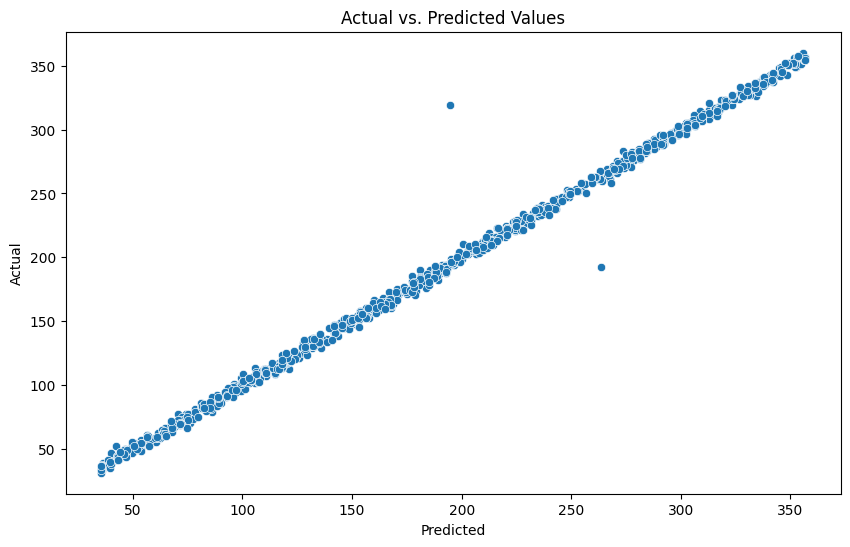

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=xtest, y=y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs. Predicted Values")
plt.show()

## Test the model with random value

In [ ]:
value = pd.read_csv('/content/test.csv')
value

,TV,Radio,Social Media\t,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,17,7.992300,1.346346,50.825600,0,1,0,0
1,80,32.392846,10.378600,300.823750,0,1,0,0
2,69,28.000481,7.370703,243.091020,0,0,1,0
3,58,14.757420,1.887768,208.896340,0,1,0,0
4,98,27.669812,1.605375,345.555931,0,0,0,1
5,42,15.966688,5.046548,148.202414,0,0,1,0
6,16,5.331943,0.326302,59.785065,1,0,0,0
7,25,8.077997,0.739072,89.390459,1,0,0,0
8,54,17.886477,2.236199,191.637788,0,1,0,0
9,25,8.077997,0.739072,89.390459,1,0,0,0


In [ ]:
value.isnull().sum()

,0
TV,0
Radio,0
Social Media\t,0
Sales,0
Influencer_Macro,0
Influencer_Mega,0
Influencer_Micro,0
Influencer_Nano,0


In [ ]:
x_value = value.drop('Sales',axis=1).to_numpy()
y_value = value['Sales'].to_numpy()

In [ ]:
value_pre = model.predict(x_value)


In [ ]:
value = value.join(pd.DataFrame(value_pre,columns=["predicted"]))[['Sales','predicted']]

In [ ]:
value['Difference'] = (value['Sales'] - value['predicted'])
value['Percentage Difference (%)'] = (value['Difference'] / value['Sales']) * 100
print(value[['Sales', 'predicted', 'Difference','Percentage Difference (%)']])

         Sales   predicted  Difference  Percentage Difference (%)
0    50.825600   60.960086  -10.134486                 -19.939727
1   300.823750  285.621340   15.202410                   5.053594
2   243.091020  246.506482   -3.415462                  -1.405014
3   208.896340  205.797476    3.098864                   1.483446
4   345.555931  347.976986   -2.421055                  -0.700626
5   148.202414  150.053367   -1.850953                  -1.248936
6    59.785065   56.754804    3.030261                   5.068592
7    89.390459   88.725901    0.664558                   0.743432
8   191.637788  192.187271   -0.549483                  -0.286730
9    89.390459   88.725901    0.664558                   0.743432
10  310.472506  316.889745   -6.417239                  -2.066927
11  151.168924  152.631095   -1.462171                  -0.967243
12  282.593988  284.537575   -1.943588                  -0.687767
13  320.439769  323.095156   -2.655387                  -0.828670
14  158.62



---



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


xtrain = model2.predict(X_train)
xtest = model2.predict(X_test)

train_mse = mean_squared_error(y_train, xtrain)
test_mse = mean_squared_error(y_test, xtest)


train_r2 = r2_score(y_train, xtrain)
test_r2 = r2_score(y_test, xtest)

print("Train MSE: ", train_mse**0.5)
print("Test MSE: ", test_mse**0.5)

print("Train r2 error: ", train_r2)
print("Test r2 error: ", test_r2)

Train MSE:  2.71281372655153
Test MSE:  5.648613578222052
Train r2 error:  0.9991580637411497
Test r2 error:  0.9961732134513326


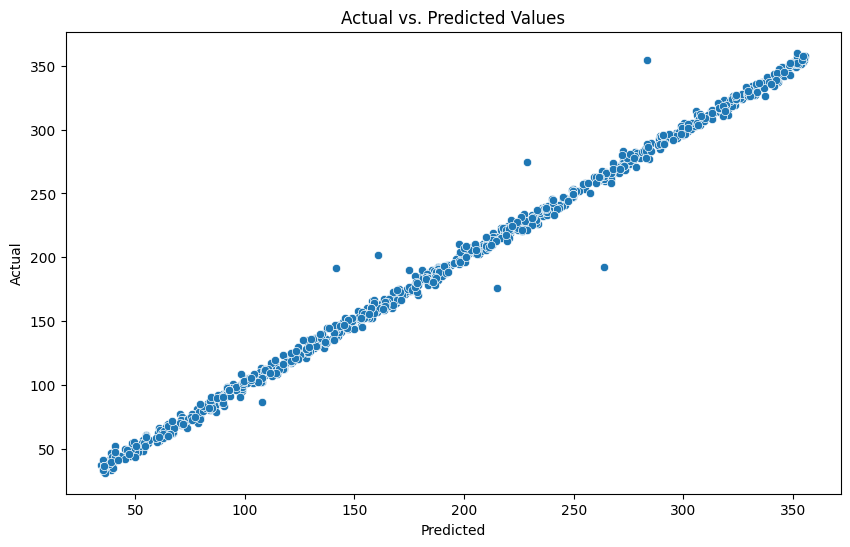

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x=xtest, y=y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs. Predicted Values")
plt.show()

In [ ]:
value_pre_2 = model2.predict(x_value)

In [ ]:
value = value.join(pd.DataFrame(value_pre_2,columns=["predicted_2"]))[['Sales','predicted_2']]

In [ ]:
value['Difference'] = value['Sales'] - value['predicted_2']
value['Percentage Difference (%)'] = (value['Difference'] / value['Sales']) * 100
print(value[['Sales', 'predicted_2', 'Difference','Percentage Difference (%)']])

         Sales  predicted_2  Difference  Percentage Difference (%)
0    50.825600    61.908276  -11.082676                 -21.805303
1   300.823750   282.998784   17.824966                   5.925385
2   243.091020   244.576760   -1.485741                  -0.611187
3   208.896340   207.573083    1.323258                   0.633452
4   345.555931   346.060551   -0.504620                  -0.146031
5   148.202414   149.127334   -0.924920                  -0.624092
6    59.785065    54.746929    5.038136                   8.427081
7    89.390459    89.231089    0.159370                   0.178285
8   191.637788   191.982018   -0.344230                  -0.179625
9    89.390459    89.231089    0.159370                   0.178285
10  310.472506   316.547074   -6.074568                  -1.956556
11  151.168924   150.879424    0.289501                   0.191508
12  282.593988   283.003622   -0.409635                  -0.144955
13  320.439769   322.129383   -1.689614                  -0.52

Prediction of  Linear Regression Model and Random Forest model together


In [ ]:
import pandas as pd


value = value.join(pd.DataFrame(value_pre, columns=["predicted_for_LR"]))
value = value.join(pd.DataFrame(value_pre_2, columns=["predicted_for_RF"]))

result = value[['Sales', 'predicted_for_LR', 'predicted_for_RF']]
print(result)


         Sales  predicted_for_LR  predicted_for_RF
0    50.825600         60.960086         62.297716
1   300.823750        285.621340        282.214295
2   243.091020        246.506482        244.331438
3   208.896340        205.797476        207.916976
4   345.555931        347.976986        345.963393
5   148.202414        150.053367        148.698910
6    59.785065         56.754804         54.852217
7    89.390459         88.725901         89.239530
8   191.637788        192.187271        191.968951
9    89.390459         88.725901         89.239530
10  310.472506        316.889745        317.404557
11  151.168924        152.631095        151.389373
12  282.593988        284.537575        283.254705
13  320.439769        323.095156        321.993498
14  158.621580        162.676644        163.189392
15  108.885316        114.789630        113.749918
16  199.478327        203.121230        199.893149
17  272.549011        273.898733        260.460316
18  318.959233        319.65534